In [136]:
### Part A


In [137]:
# Step 1: Import necessary libraries
import pandas as pd
import statsmodels.api as sm

In [138]:
# Step 2: Load the dataset
# Replace with the correct file path where your dataset is saved
data = pd.read_csv('/Users/Sam/Downloads/dataset_lm.csv')

# Preview the first few rows of the dataset to confirm it is loaded correctly
print(data.head())

# Check the structure of the dataset (columns, types, missing values, etc.)
print(data.info())


   Dependent Var  Explanatory Var #1  Explanatory Var #2  Explanatory Var #3  \
0      56.293458           13.698667           50.639873                   0   
1      58.473431            2.714725           65.845845                   1   
2      94.195330           11.618072           65.072497                   0   
3      29.074583            0.818623           45.408996                   1   
4      86.035569            9.077544           73.548021                   0   

   Explanatory Var #4  Explanatory Var #5  Explanatory Var #6  \
0          -18.568035           45.121911           11.412501   
1          -25.105932           47.190213           10.080280   
2           -7.897464           52.163036           11.057301   
3          -18.316132           54.356714            5.029029   
4          -19.204165           47.186807           12.128134   

   Explanatory Var #7  Explanatory Var #8  Explanatory Var #9  \
0           56.410757                   2          -12.281132  

                     Dependent Var  Explanatory Var #1  Explanatory Var #2  \
Dependent Var             1.000000            0.311095            0.645171   
Explanatory Var #1        0.311095            1.000000            0.052714   
Explanatory Var #2        0.645171            0.052714            1.000000   
Explanatory Var #3        0.120416           -0.009571           -0.019324   
Explanatory Var #4        0.630262           -0.096572            0.007029   
Explanatory Var #5       -0.195131            0.049856            0.041223   
Explanatory Var #6       -0.036227            0.013637           -0.072469   
Explanatory Var #7       -0.040157           -0.011440           -0.002829   
Explanatory Var #8       -0.040821            0.045720           -0.060507   
Explanatory Var #9       -0.006595           -0.015625            0.004473   
Explanatory Var #10       0.024838           -0.024453           -0.015771   
Explanatory Var #11      -0.007314            0.052086          

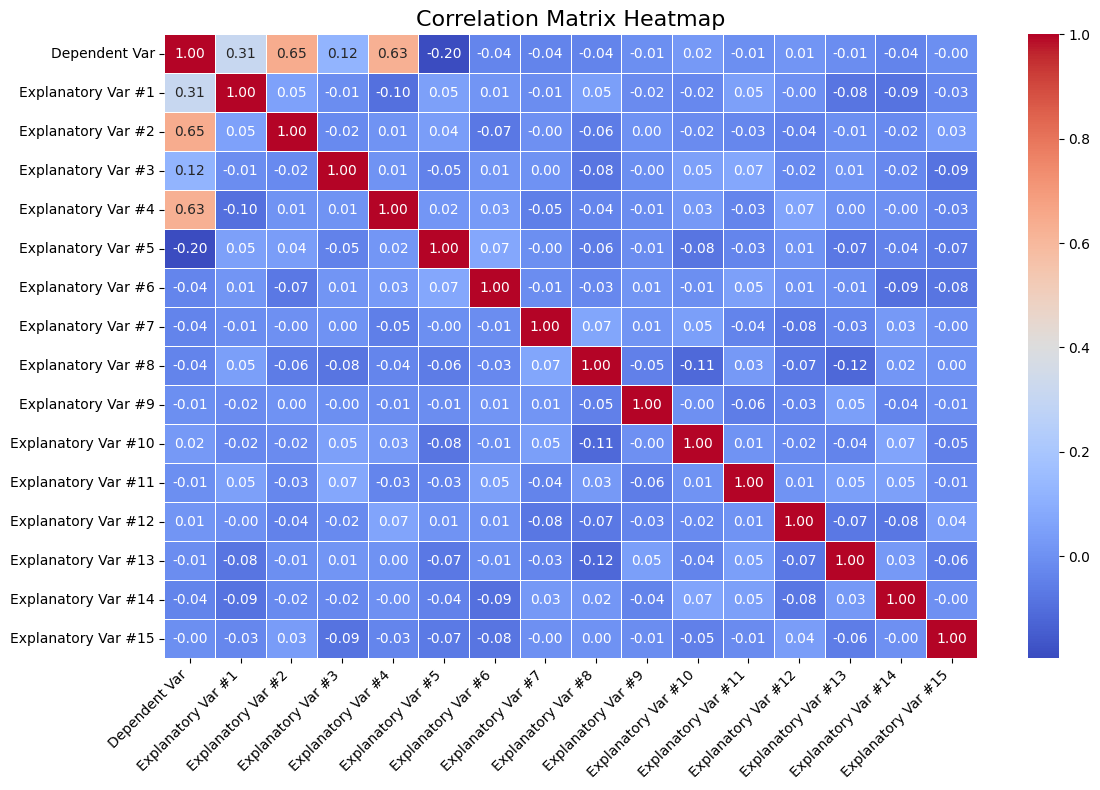

In [139]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout for a clean view
plt.show()

correlation_matrix = data.corr()

In [140]:
# Step 3: Define the dependent (y) and explanatory (X) variables
# The first column is the dependent variable, and columns 2-16 are the explanatory variables
y = data.iloc[:, 0]  # Dependent variable (target)
X = data.iloc[:, 1:16]  # Explanatory variables (features)

# Step 4: Add a constant term (intercept) to the model
X = sm.add_constant(X)  # This adds a column of 1s for the intercept

# Step 5: Build the OLS model and fit it to the data
ols_model = sm.OLS(y, X).fit()  # Fit the model

# Output the summary of the regression model
print(ols_model.summary())



                            OLS Regression Results                            
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.228e+30
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:05:46   Log-Likelihood:                 11955.
No. Observations:                 422   AIC:                        -2.388e+04
Df Residuals:                     406   BIC:                        -2.381e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   1

In [141]:
### Part B

In [142]:
# Step 1: Get the residuals (error values) from the OLS model
residuals = ols_model.resid  # Residuals from the OLS model

# Step 2: Calculate the standard deviation of the residuals
std_residuals = residuals.std()

# Step 3: Display the standard deviation
print("Standard Deviation of Residuals:", std_residuals)


Standard Deviation of Residuals: 4.908126743395484e-14


In [143]:
# Step 4: Calculate autocorrelation values for the first three lags
autocorr_lag_1 = residuals.autocorr(lag=1)
autocorr_lag_2 = residuals.autocorr(lag=2)
autocorr_lag_3 = residuals.autocorr(lag=3)

# Step 5: Display the autocorrelation values
print("Autocorrelation for Lag 1:", autocorr_lag_1)
print("Autocorrelation for Lag 2:", autocorr_lag_2)
print("Autocorrelation for Lag 3:", autocorr_lag_3)


Autocorrelation for Lag 1: 0.10417605427712472
Autocorrelation for Lag 2: -0.016275206486095383
Autocorrelation for Lag 3: 0.02473461878576162


In [144]:
import numpy as np
from scipy.linalg import toeplitz

# Step 6: Define the covariance matrix based on autocorrelation values
rho = [1, autocorr_lag_1, autocorr_lag_2, autocorr_lag_3]  # Use autocorrelations
n = len(residuals)
cov_matrix = toeplitz([rho[0]] + [0]*(n-1))  # Toeplitz matrix

# Step 7: Fit the GLS model
gls_model = sm.GLS(y, X, sigma=cov_matrix).fit()

# Step 8: Display the GLS model summary
print(gls_model.summary())


                            GLS Regression Results                            
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            GLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.283e+30
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:05:47   Log-Likelihood:                 11964.
No. Observations:                 422   AIC:                        -2.390e+04
Df Residuals:                     406   BIC:                        -2.383e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   1

In [145]:
# Step 1: Get the residuals (error values) from the OLS model
residuals = gls_model.resid  # Residuals from the OLS model

# Step 2: Calculate the standard deviation of the residuals
std_residuals = residuals.std()

# Step 3: Display the standard deviation
print("Standard Deviation of Residuals:", std_residuals)



Standard Deviation of Residuals: 4.908126743395484e-14


In [146]:
# Step 1: Get the residuals (error values) from the GLS model
gls_residuals = gls_model.resid

# Step 2: Calculate the standard deviation of the GLS residuals
std_gls_residuals = gls_residuals.std()

# Step 3: Print the standard deviation of the GLS residuals
print("Standard Deviation of GLS Residuals:", std_gls_residuals)


Standard Deviation of GLS Residuals: 4.908126743395484e-14


In [147]:
# Standard deviation of OLS residuals
std_ols_residuals = ols_model.resid.std()
print("Standard Deviation of OLS Residuals:", std_ols_residuals)

# Standard deviation of GLS residuals
std_gls_residuals = gls_model.resid.std()
print("Standard Deviation of GLS Residuals:", std_gls_residuals)


Standard Deviation of OLS Residuals: 4.908126743395484e-14
Standard Deviation of GLS Residuals: 4.908126743395484e-14


In [148]:
### Part C

In [149]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Split the dataset into training and test sets (test size = 0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Check the shapes of the training and test sets
print(X_train.shape, X_test.shape)


(211, 16) (211, 16)


In [150]:
# Step 2: Run the Lasso model with alpha=1 and fit it to the training set
lasso_model = Lasso(alpha=1).fit(X_train, y_train)

# Display the estimated coefficients
print("Lasso Coefficients:", lasso_model.coef_)


Lasso Coefficients: [ 0.          1.26972628  1.68394638  2.02626245  2.08756512 -0.91746375
 -0.          0.         -0.          0.         -0.          0.01314162
  0.         -0.          0.         -0.03617731]


In [151]:
# Step 3: Predict using the test set
y_pred = lasso_model.predict(X_test)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 0.04432190198291582


In [152]:
# Step 4: Test multiple values of alpha to find the one that minimizes MAPE
import numpy as np

alphas = np.logspace(-3, 3, 50)  # Range of alpha values to test
best_alpha = None
min_mape = float('inf')

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha).fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    if mape < min_mape:
        min_mape = mape
        best_alpha = alpha

print("Best alpha:", best_alpha)
print("Minimum MAPE:", min_mape)


Best alpha: 0.001
Minimum MAPE: 4.412831807427602e-05


In [156]:
### Part D

Optimized Beta Coefficients: [46.65947505  1.07858154]
Mean Absolute Percentage Error (MAPE): 49.4101%


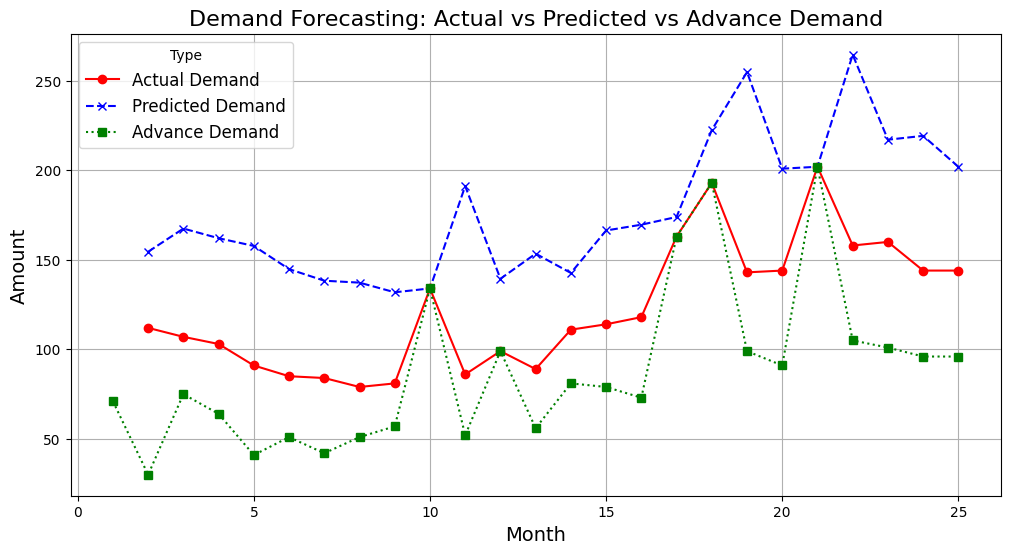

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Input data
data = {
    'Month': list(range(1, 26)),
    'Demand': [100, 112, 107, 103, 91, 85, 84, 79, 81, 134, 86, 99, 89, 111, 114, 
               118, 163, 193, 143, 144, 202, 158, 160, 144, 144],
    'Advance_demand': [71, 30, 75, 64, 41, 51, 42, 51, 57, 134, 52, 99, 56, 81, 79, 
                       73, 163, 193, 99, 91, 202, 105, 101, 96, 96]
}

df = pd.DataFrame(data)

# Define Y (Demand for months 2-25), X (Demand for months 1-24), and L (Advance demand for months 2-25)
Y = df['Demand'][1:].values  # Actual demand from month 2 to 25
X = np.column_stack([np.ones(len(Y)), df['Demand'][:-1].values])  # Constant + previous demand (month 1 to 24)

# Optimization process: define objective function and constraint
def objective_function(beta):
    predicted_demand = X @ beta  # Predict demand
    error = Y - predicted_demand  # Calculate residuals
    return error.T @ error  # Sum of squared errors

def constraint_function(beta):
    L = df['Advance_demand'][1:].values  # Advance demand for months 2 to 25
    return X @ beta - L  # Constraint: predicted demand >= advance demand

# Set initial guess and constraints
initial_guess = np.ones(X.shape[1])
constraints = {'type': 'ineq', 'fun': constraint_function}

# Run optimization
from scipy.optimize import minimize
result = minimize(objective_function, initial_guess, constraints=[constraints])

# Extract optimized beta coefficients and predicted demand
optimized_beta = result.x
predicted_demand = X @ optimized_beta

# Print optimized beta and performance metrics
print(f"Optimized Beta Coefficients: {optimized_beta}")

# Calculate Mean Absolute Percentage Error (MAPE) for this model
mape = np.mean(np.abs((Y - predicted_demand) / Y)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

# Plot actual demand, advance demand, and predicted demand
plt.figure(figsize=(12, 6))
plt.plot(df['Month'][1:], Y, label='Actual Demand', color='red', linestyle='-', marker='o')
plt.plot(df['Month'][1:], predicted_demand, label='Predicted Demand', color='blue', linestyle='--', marker='x')
plt.plot(df['Month'], df['Advance_demand'], label='Advance Demand', color='green', linestyle=':', marker='s')

# Customize the plot
plt.title('Demand Forecasting: Actual vs Predicted vs Advance Demand', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend(title='Type', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


Best Alpha: 323.745754281764
Mean Absolute Percentage Error (MAPE): 0.0455


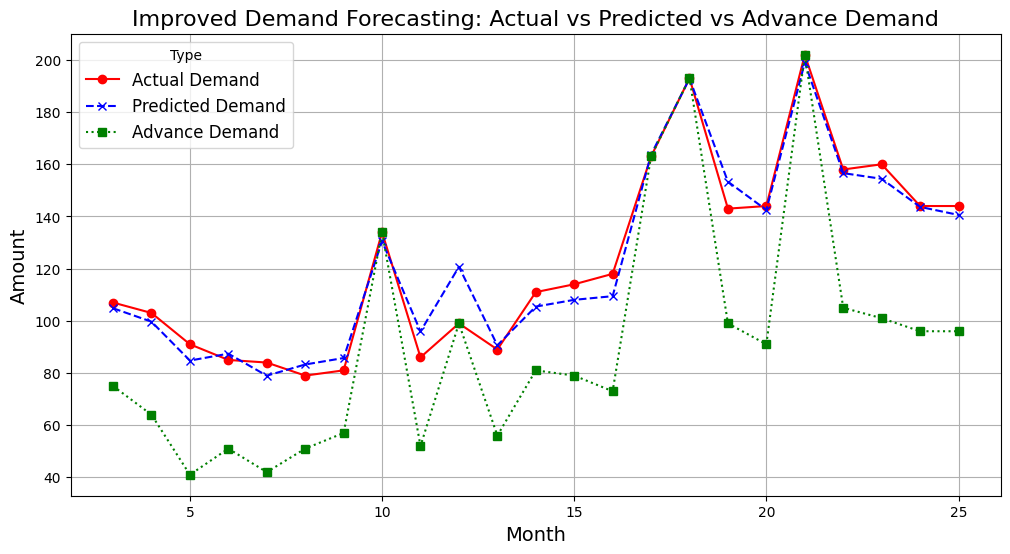

In [158]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Load the data
data = {
    'Month': list(range(1, 26)),
    'Demand': [100, 112, 107, 103, 91, 85, 84, 79, 81, 134, 86, 99, 89, 111, 114,
               118, 163, 193, 143, 144, 202, 158, 160, 144, 144],
    'Advance_demand': [71, 30, 75, 64, 41, 51, 42, 51, 57, 134, 52, 99, 56, 81, 79,
                       73, 163, 193, 99, 91, 202, 105, 101, 96, 96]
}
df = pd.DataFrame(data)

# Step 2: Add trend and seasonality features
df['Trend'] = df['Month']  # Trend is represented by the month number
df['Seasonality'] = df['Month'] % 12  # Seasonality with a 12-month cycle

# Step 3: Create lag features (using 1 and 2 month lags)
df['Lag_1'] = df['Demand'].shift(1)
df['Lag_2'] = df['Demand'].shift(2)

# Drop the first two rows with NaN values caused by the lag
df = df.dropna().reset_index(drop=True)

# Step 4: Define the features (X) and target (y)
X = df[['Trend', 'Seasonality', 'Lag_1', 'Lag_2', 'Advance_demand']]
y = df['Demand']

# Step 5: Implement cross-validation with Ridge regression to select the best alpha
tscv = TimeSeriesSplit(n_splits=5)  # Time-series cross-validation
ridge = Ridge()

# Define a range of alpha values for tuning
param_grid = {'alpha': np.logspace(-3, 3, 50)}

# GridSearchCV to find the best alpha with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=tscv, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X, y)

# Step 6: Get the best alpha and model
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

print(f"Best Alpha: {best_alpha}")

# Step 7: Make predictions using the best model
y_pred = best_model.predict(X)

# Step 8: Calculate MAPE to evaluate the model
mape = mean_absolute_percentage_error(y, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Step 9: Plot actual vs predicted demand
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Month'], y, label='Actual Demand', color='red', marker='o')
plt.plot(df['Month'], y_pred, label='Predicted Demand', color='blue', linestyle='--', marker='x')
plt.plot(df['Month'], df['Advance_demand'], label='Advance Demand', color='green', linestyle=':', marker='s')

# Customize the plot
plt.title('Improved Demand Forecasting: Actual vs Predicted vs Advance Demand', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend(title='Type', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()
